In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**shift(0,30,60,90,120,150,180,210,240,270,300,330,360)**

In [2]:
df = pd.read_csv("US_research2.csv", encoding="utf-8").drop(columns="Unnamed: 0")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#df[['Headline', 'gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']] = df[['Headline', 'gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']].shift()
df = df.dropna().reset_index(drop=True)
df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
0,2014-01-02,Boehner Is Said to Back Change on Immigration ...,1223.48,95.42,24.30,1.06,6.04,0.73,105.32,13.15,51.53
1,2014-01-03,Qaeda-Aligned Militants Threaten Key Iraqi Cit...,1236.86,94.22,24.28,1.07,6.04,0.73,104.83,13.09,51.67
2,2014-01-04,Access to Abortion Falling as States Pass Rest...,1236.86,94.22,24.28,1.07,6.04,0.73,104.83,13.09,51.67
3,2014-01-05,New York State Is Set to Loosen Marijuana Laws...,1234.33,94.18,24.28,1.07,6.04,0.73,104.83,13.09,51.67
4,2014-01-06,"The Muslim Brotherhood, Back in a Fight to Sur...",1237.73,93.68,24.33,1.06,6.04,0.74,104.91,13.07,51.37
...,...,...,...,...,...,...,...,...,...,...,...
3281,2022-12-27,Retirees Are One Reason the Fed Has Given Up o...,1812.37,79.75,22.76,1.36,6.96,0.94,132.76,19.36,98.69
3282,2022-12-28,‘Tragic Battle’: On the Front Lines of China’s...,1805.94,78.60,22.73,1.35,6.96,0.94,133.49,19.46,97.40
3283,2022-12-29,U.S. Scrambles to Stop Iran From Providing Dro...,1815.18,78.60,22.80,1.36,6.98,0.94,134.03,19.42,98.60
3284,2022-12-30,Russian Missile Barrage Staggers Ukraine’s Air...,1824.44,80.46,22.72,1.36,6.96,0.94,132.92,19.46,98.21


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']] = scaler.fit_transform(df[['gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']])
df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
0,2014-01-02,Boehner Is Said to Back Change on Immigration ...,-0.820342,1.602611,-1.026463,-2.907813,-1.860818,-2.397740,-0.820714,-2.162533,51.53
1,2014-01-03,Qaeda-Aligned Militants Threaten Key Iraqi Cit...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
2,2014-01-04,Access to Abortion Falling as States Pass Rest...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
3,2014-01-05,New York State Is Set to Loosen Marijuana Laws...,-0.779485,1.542696,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
4,2014-01-06,"The Muslim Brotherhood, Back in a Fight to Sur...",-0.766681,1.518537,-1.000351,-2.907813,-1.860818,-2.230419,-0.865658,-2.194465,51.37
...,...,...,...,...,...,...,...,...,...,...,...
3281,2022-12-27,Retirees Are One Reason the Fed Has Given Up o...,1.397216,0.845460,-2.366886,1.049613,1.181559,1.115999,2.187209,0.316161,98.69
3282,2022-12-28,‘Tragic Battle’: On the Front Lines of China’s...,1.373003,0.789894,-2.392998,0.917699,1.181559,1.115999,2.267230,0.356075,97.40
3283,2022-12-29,U.S. Scrambles to Stop Iran From Providing Dro...,1.407798,0.789894,-2.332070,1.049613,1.247697,1.115999,2.326424,0.340109,98.60
3284,2022-12-30,Russian Missile Barrage Staggers Ukraine’s Air...,1.442668,0.879766,-2.401702,1.049613,1.181559,1.115999,2.204748,0.356075,98.21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3286 non-null   datetime64[ns]
 1   Headline  3286 non-null   object        
 2   gold      3286 non-null   float64       
 3   oil       3286 non-null   float64       
 4   bond      3286 non-null   float64       
 5   cad       3286 non-null   float64       
 6   cny       3286 non-null   float64       
 7   eur       3286 non-null   float64       
 8   jpy       3286 non-null   float64       
 9   mxn       3286 non-null   float64       
 10  ETF       3286 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 282.5+ KB


In [5]:
df.describe()

,Date,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
count,3286,3.286000e+03,3.286000e+03,3.286000e+03,3.286000e+03,3.286000e+03,3.286000e+03,3.286000e+03,3286.000000,3286.000000
mean,2018-07-02 11:59:59.999999744,-1.383893e-16,-5.189600e-17,-4.324667e-16,9.687253e-16,-3.355941e-15,5.881547e-16,-7.611413e-16,0.000000,72.713253
min,2014-01-02 00:00:00,-1.462010e+00,-2.385600e+00,-2.889129e+00,-2.907813e+00,-1.893887e+00,-2.565061e+00,-1.413749e+00,-2.286268,48.010000
25%,2016-04-02 06:00:00,-7.734784e-01,-6.992835e-01,-6.260769e-01,-2.695289e-01,-8.026000e-01,-5.572101e-01,-6.058626e-01,-0.330455,56.470000
50%,2018-07-02 12:00:00,-4.824119e-01,-2.397743e-01,-1.908745e-01,2.581279e-01,-4.200587e-02,1.120734e-01,-2.501516e-01,0.212383,71.970000
75%,2020-09-30 18:00:00,1.090654e+00,4.916475e-01,6.011938e-01,6.538705e-01,8.839348e-01,6.140361e-01,2.568325e-01,0.607537,82.847500
max,2022-12-31 00:00:00,2.369020e+00,3.121746e+00,2.455156e+00,2.368755e+00,2.305915e+00,2.789208e+00,4.096757e+00,2.703051,107.120000
std,NaN,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152,16.692409


In [6]:
stopwords_object = stopwords.words('english')
df["Headline"] = df["Headline"].str.lower()

def preprocessing_text(data):
    if type(data) is float:
      data = str(data);

    data = re.sub("[^a-zA-Z]"," ", data)

    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords_object]


    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]


    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]

    return " ".join(lem_words)

In [7]:
df["Headline2"] = df["Headline"].apply(preprocessing_text)
df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF,Headline2
0,2014-01-02,boehner is said to back change on immigration ...,-0.820342,1.602611,-1.026463,-2.907813,-1.860818,-2.397740,-0.820714,-2.162533,51.53,boehner said back chang immigr video boehner i...
1,2014-01-03,qaeda-aligned militants threaten key iraqi cit...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,qaeda align milit threaten key iraqi citi emer...
2,2014-01-04,access to abortion falling as states pass rest...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,access abort fall state pas restrict graphic a...
3,2014-01-05,new york state is set to loosen marijuana laws...,-0.779485,1.542696,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,new york state set loosen marijuana law map st...
4,2014-01-06,"the muslim brotherhood, back in a fight to sur...",-0.766681,1.518537,-1.000351,-2.907813,-1.860818,-2.230419,-0.865658,-2.194465,51.37,muslim brotherhood back fight surviv sudan los...
...,...,...,...,...,...,...,...,...,...,...,...,...
3281,2022-12-27,retirees are one reason the fed has given up o...,1.397216,0.845460,-2.366886,1.049613,1.181559,1.115999,2.187209,0.316161,98.69,retire one reason fed given big worker rebound...
3282,2022-12-28,‘tragic battle’: on the front lines of china’s...,1.373003,0.789894,-2.392998,0.917699,1.181559,1.115999,2.267230,0.356075,97.40,tragic battl front line china covid crisi sout...
3283,2022-12-29,u.s. scrambles to stop iran from providing dro...,1.407798,0.789894,-2.332070,1.049613,1.247697,1.115999,2.326424,0.340109,98.60,u scrambl stop iran provid drone russia hard l...
3284,2022-12-30,russian missile barrage staggers ukraine’s air...,1.442668,0.879766,-2.401702,1.049613,1.181559,1.115999,2.204748,0.356075,98.21,russian missil barrag stagger ukrain air defen...


## **TF-IDF**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [9]:
tfidf_result = tfidf.fit_transform(df["Headline2"])
df["tfidf_Headline"] = list(tfidf_result.toarray())

In [10]:
df["tfidf_Headline"] = np.array(df['tfidf_Headline'].tolist())
X = df[['tfidf_Headline', 'gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']]
y = df["ETF"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

### **Random Forest**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")

rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
print(f"Random Forest MAPE: {rf_mape}")

r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest R제곱: {r2}')

Random Forest RMSE: 1.1630813911593536
Random Forest MAE: 0.5234203854722339
Random Forest MAPE: 0.007374364106037852
Random Forest R제곱: 0.9950992116898836


In [12]:
feature_importances = rf.feature_importances_

for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

tfidf_Headline: 1.656136869889577e-07
gold: 0.589945930467899
oil: 0.20214754325191672
bond: 0.02409490437281936
cad: 0.029106118440778515
cny: 0.030276938552138886
eur: 0.007026921141255724
jpy: 0.00861146257196061
mxn: 0.1087900155875443


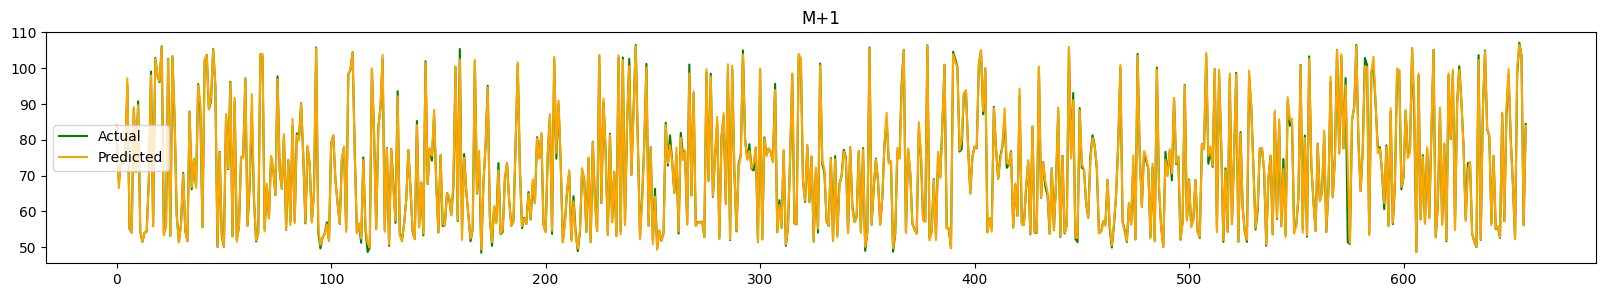

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(y_test, label='Actual', color='green')
plt.plot(rf_predictions, label='Predicted', color='orange', linestyle='-')
plt.title('M+1')
plt.legend()
plt.show()

### **LSTM**

In [14]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import PReLU

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_lstm_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
y_lstm_train = np.reshape(y_train, (y_train.shape[0], 1))

X_lstm_val = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1))
y_lstm_val = np.reshape(y_val, (y_val.shape[0], 1))

X_lstm_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))
y_lstm_test = np.reshape(y_test, (y_test.shape[0], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(784, input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
#lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(256))
lstm_model.add(PReLU())
#lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dense(64))
lstm_model.add(PReLU())
lstm_model.add(Dense(1, activation='linear'))
lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

In [15]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 784)               2464896   
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 p_re_lu (PReLU)             (None, 256)               256       
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 p_re_lu_1 (PReLU)           (None, 64)                64        
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2682689 (10.23 MB)
Trainable params: 26826

In [16]:
history = lstm_model.fit(X_lstm_train, y_lstm_train, epochs=300, batch_size=32,
                         validation_data=(X_lstm_val, y_lstm_val),verbose=1)

lstm_predictions = lstm_model.predict(X_lstm_test)

lstm_rmse = mean_squared_error(y_lstm_test, lstm_predictions, squared=False)
print(f"LSTM RMSE: {lstm_rmse}")

lstm_mae = mean_absolute_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAE: {lstm_mae}")

lstm_mape = mean_absolute_percentage_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAPE: {lstm_mape}")

r2 = r2_score(y_lstm_test, lstm_predictions)
print(f'LSTM R제곱: {r2}')

Epoch 1/300
83/83 [==============================] - 5s 11ms/step - loss: 991.0558 - mape: 31.8962 - val_loss: 278.2391 - val_mape: 19.5737
Epoch 2/300
83/83 [==============================] - 0s 5ms/step - loss: 286.5695 - mape: 19.9940 - val_loss: 276.0524 - val_mape: 19.7698
Epoch 3/300
83/83 [==============================] - 0s 5ms/step - loss: 283.5479 - mape: 19.9374 - val_loss: 279.4825 - val_mape: 20.8134
Epoch 4/300
83/83 [==============================] - 0s 5ms/step - loss: 289.7460 - mape: 20.0612 - val_loss: 288.9163 - val_mape: 21.6111
Epoch 5/300
83/83 [==============================] - 0s 5ms/step - loss: 282.7767 - mape: 19.8423 - val_loss: 302.2380 - val_mape: 18.8861
Epoch 6/300
83/83 [==============================] - 0s 5ms/step - loss: 278.6988 - mape: 19.6918 - val_loss: 270.3097 - val_mape: 19.2027
Epoch 7/300
83/83 [==============================] - 0s 5ms/step - loss: 276.9313 - mape: 19.5448 - val_loss: 258.3557 - val_mape: 19.9638
Epoch 8/300
83/83 [=======

## **Hybrid**

In [17]:
X = df[['gold', 'oil', 'bond', 'cny', 'mxn']]
y = df["ETF"].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_lstm_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
y_lstm_train = np.reshape(y_train, (y_train.shape[0], 1))

X_lstm_val = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1))
y_lstm_val = np.reshape(y_val, (y_val.shape[0], 1))

X_lstm_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))
y_lstm_test = np.reshape(y_test, (y_test.shape[0], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(784, input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
#lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(256))
lstm_model.add(PReLU())
#lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dense(64))
lstm_model.add(PReLU())
lstm_model.add(Dense(1, activation='linear'))
lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

history = lstm_model.fit(X_lstm_train, y_lstm_train, epochs=300, batch_size=32,
                         validation_data=(X_lstm_val, y_lstm_val),verbose=1)

lstm_predictions = lstm_model.predict(X_lstm_test)

lstm_rmse = mean_squared_error(y_lstm_test, lstm_predictions, squared=False)
print(f"LSTM RMSE: {lstm_rmse}")

lstm_mae = mean_absolute_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAE: {lstm_mae}")

lstm_mape = mean_absolute_percentage_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAPE: {lstm_mape}")

r2 = r2_score(y_lstm_test, lstm_predictions)
print(f'LSTM R제곱: {r2}')

Epoch 1/300
83/83 [==============================] - 3s 10ms/step - loss: 1059.6757 - mape: 30.6930 - val_loss: 117.3351 - val_mape: 14.6153
Epoch 2/300
83/83 [==============================] - 0s 5ms/step - loss: 119.5481 - mape: 13.3616 - val_loss: 140.9353 - val_mape: 15.7916
Epoch 3/300
83/83 [==============================] - 0s 5ms/step - loss: 96.7935 - mape: 11.8433 - val_loss: 143.7885 - val_mape: 12.9325
Epoch 4/300
83/83 [==============================] - 0s 5ms/step - loss: 112.6535 - mape: 11.9448 - val_loss: 129.7144 - val_mape: 12.5915
Epoch 5/300
83/83 [==============================] - 0s 5ms/step - loss: 85.2439 - mape: 10.1208 - val_loss: 73.1612 - val_mape: 9.6290
Epoch 6/300
83/83 [==============================] - 0s 5ms/step - loss: 54.3023 - mape: 8.4508 - val_loss: 41.8316 - val_mape: 7.4362
Epoch 7/300
83/83 [==============================] - 0s 5ms/step - loss: 33.1393 - mape: 6.6973 - val_loss: 29.4931 - val_mape: 6.1920
Epoch 8/300
83/83 [==================

## **BERT**

In [18]:
!pip install pandas transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [19]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

df['headline']=df["Headline"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [20]:
tokenized_headlines = df['headline'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

max_len = max(map(len, tokenized_headlines))
padded_headlines = torch.tensor([i + [0]*(max_len-len(i)) for i in tokenized_headlines])

In [21]:
attention_mask = (padded_headlines != 0).float()

In [22]:
with torch.no_grad():
    outputs = model(padded_headlines, attention_mask=attention_mask)

In [23]:
bert_embeddings = outputs.last_hidden_state[:, 0, :]

In [24]:
bert_embeddings.shape

torch.Size([3286, 768])

In [25]:
bert_headline = bert_embeddings.tolist()
df['bert_headline'] = bert_headline
df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF,Headline2,tfidf_Headline,headline,bert_headline
0,2014-01-02,boehner is said to back change on immigration ...,-0.820342,1.602611,-1.026463,-2.907813,-1.860818,-2.397740,-0.820714,-2.162533,51.53,boehner said back chang immigr video boehner i...,0.0,boehner is said to back change on immigration ...,"[-0.22912585735321045, -0.47229185700416565, -..."
1,2014-01-03,qaeda-aligned militants threaten key iraqi cit...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,qaeda align milit threaten key iraqi citi emer...,0.0,qaeda-aligned militants threaten key iraqi cit...,"[-0.33107689023017883, -0.24410291016101837, -..."
2,2014-01-04,access to abortion falling as states pass rest...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,access abort fall state pas restrict graphic a...,0.0,access to abortion falling as states pass rest...,"[-0.1879020631313324, -0.31732454895973206, -0..."
3,2014-01-05,new york state is set to loosen marijuana laws...,-0.779485,1.542696,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,new york state set loosen marijuana law map st...,0.0,new york state is set to loosen marijuana laws...,"[-0.197188600897789, -0.12279971688985825, 0.1..."
4,2014-01-06,"the muslim brotherhood, back in a fight to sur...",-0.766681,1.518537,-1.000351,-2.907813,-1.860818,-2.230419,-0.865658,-2.194465,51.37,muslim brotherhood back fight surviv sudan los...,0.0,"the muslim brotherhood, back in a fight to sur...","[-0.4068496525287628, -0.1629340499639511, 0.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,2022-12-27,retirees are one reason the fed has given up o...,1.397216,0.845460,-2.366886,1.049613,1.181559,1.115999,2.187209,0.316161,98.69,retire one reason fed given big worker rebound...,0.0,retirees are one reason the fed has given up o...,"[-0.029789062216877937, -0.22053202986717224, ..."
3282,2022-12-28,‘tragic battle’: on the front lines of china’s...,1.373003,0.789894,-2.392998,0.917699,1.181559,1.115999,2.267230,0.356075,97.40,tragic battl front line china covid crisi sout...,0.0,‘tragic battle’: on the front lines of china’s...,"[-0.15099486708641052, 0.007491313852369785, 0..."
3283,2022-12-29,u.s. scrambles to stop iran from providing dro...,1.407798,0.789894,-2.332070,1.049613,1.247697,1.115999,2.326424,0.340109,98.60,u scrambl stop iran provid drone russia hard l...,0.0,u.s. scrambles to stop iran from providing dro...,"[-0.15325941145420074, 0.11535318940877914, -0..."
3284,2022-12-30,russian missile barrage staggers ukraine’s air...,1.442668,0.879766,-2.401702,1.049613,1.181559,1.115999,2.204748,0.356075,98.21,russian missil barrag stagger ukrain air defen...,0.0,russian missile barrage staggers ukraine’s air...,"[0.10888464748859406, 0.06651262938976288, 0.2..."


## **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# 데이터 전처리
df["bert_headline"] = np.array(df['bert_headline'].tolist())
X = df[['bert_headline', 'gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']]
y = df["ETF"].values

# 훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Random Forest Regressor 모델 생성 및 훈련
rf2 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, random_state=20)
rf2.fit(X_train, y_train)

rf2_predictions = rf2.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf2_predictions, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

rf_mae = mean_absolute_error(y_test, rf2_predictions)
print(f"Random Forest MAE: {rf_mae}")

rf_mape = mean_absolute_percentage_error(y_test, rf2_predictions)
print(f"Random Forest MAPE: {rf_mape}")

r2 = r2_score(y_test, rf2_predictions)
print(f'Random Forest R제곱: {r2}')

Random Forest RMSE: 1.0451186449898955
Random Forest MAE: 0.5885540653826804
Random Forest MAPE: 0.008220261892566303
Random Forest R제곱: 0.9960455777704876


In [27]:
feature_importances = rf2.feature_importances_

# Displaying feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

bert_headline: 0.00033132103369651485
gold: 0.5878985679831236
oil: 0.20888477491265234
bond: 0.013014232064948412
cad: 0.035681960048316586
cny: 0.03857753375224777
eur: 0.005287740906370415
jpy: 0.008583677214689186
mxn: 0.10174019208395525


## **LSTM**

In [28]:
from keras.layers import PReLU

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_lstm_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
y_lstm_train = np.reshape(y_train, (y_train.shape[0], 1))

X_lstm_val = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1))
y_lstm_val = np.reshape(y_val, (y_val.shape[0], 1))

X_lstm_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))
y_lstm_test = np.reshape(y_test, (y_test.shape[0], 1))

lstm2_model = Sequential()
lstm2_model.add(LSTM(784, input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
lstm2_model.add(Dense(256))
lstm2_model.add(PReLU())
lstm2_model.add(Dense(64))
lstm2_model.add(PReLU())
lstm2_model.add(Dense(1, activation='linear'))
lstm2_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

In [29]:
lstm2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 784)               2464896   
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 p_re_lu_4 (PReLU)           (None, 256)               256       
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 p_re_lu_5 (PReLU)           (None, 64)                64        
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2682689 (10.23 MB)
Trainable params: 268

In [30]:
history = lstm2_model.fit(X_lstm_train, y_lstm_train, epochs=300, batch_size=32,
                         validation_data=(X_lstm_val, y_lstm_val),verbose=1)

lstm_predictions = lstm2_model.predict(X_lstm_test)

lstm_rmse = mean_squared_error(y_lstm_test, lstm_predictions, squared=False)
print(f"LSTM RMSE: {lstm_rmse}")

lstm_mae = mean_absolute_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAE: {lstm_mae}")

lstm_mape = mean_absolute_percentage_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAPE: {lstm_mape}")

r2 = r2_score(y_lstm_test, lstm_predictions)
print(f'LSTM R제곱: {r2}')

Epoch 1/300
83/83 [==============================] - 3s 10ms/step - loss: 930.7578 - mape: 29.2775 - val_loss: 212.8436 - val_mape: 15.9752
Epoch 2/300
83/83 [==============================] - 0s 5ms/step - loss: 244.6116 - mape: 18.2866 - val_loss: 256.9452 - val_mape: 18.8201
Epoch 3/300
83/83 [==============================] - 0s 5ms/step - loss: 264.5541 - mape: 19.2188 - val_loss: 244.2018 - val_mape: 18.9181
Epoch 4/300
83/83 [==============================] - 0s 5ms/step - loss: 257.3600 - mape: 18.7984 - val_loss: 252.0122 - val_mape: 16.9491
Epoch 5/300
83/83 [==============================] - 0s 5ms/step - loss: 239.4853 - mape: 18.0365 - val_loss: 203.8370 - val_mape: 16.4087
Epoch 6/300
83/83 [==============================] - 0s 5ms/step - loss: 171.0457 - mape: 14.9801 - val_loss: 102.0933 - val_mape: 10.9487
Epoch 7/300
83/83 [==============================] - 0s 5ms/step - loss: 88.4180 - mape: 10.6027 - val_loss: 76.3313 - val_mape: 10.2880
Epoch 8/300
83/83 [=========

## **Hybrid**

In [31]:
X = df[['gold', 'oil', 'bond', 'cny', 'mxn']]
y = df["ETF"].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_lstm_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
y_lstm_train = np.reshape(y_train, (y_train.shape[0], 1))

X_lstm_val = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1))
y_lstm_val = np.reshape(y_val, (y_val.shape[0], 1))

X_lstm_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))
y_lstm_test = np.reshape(y_test, (y_test.shape[0], 1))

lstm2_model = Sequential()
lstm2_model.add(LSTM(784, input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
lstm2_model.add(Dense(256))
lstm2_model.add(PReLU())
lstm2_model.add(Dense(64))
lstm2_model.add(PReLU())
lstm2_model.add(Dense(1, activation='linear'))
lstm2_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

history = lstm2_model.fit(X_lstm_train, y_lstm_train, epochs=300, batch_size=32,
                         validation_data=(X_lstm_val, y_lstm_val),verbose=1)

lstm_predictions = lstm2_model.predict(X_lstm_test)

lstm_rmse = mean_squared_error(y_lstm_test, lstm_predictions, squared=False)
print(f"LSTM RMSE: {lstm_rmse}")

lstm_mae = mean_absolute_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAE: {lstm_mae}")

lstm_mape = mean_absolute_percentage_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAPE: {lstm_mape}")

r2 = r2_score(y_lstm_test, lstm_predictions)
print(f'LSTM R제곱: {r2}')

Epoch 1/300
83/83 [==============================] - 3s 10ms/step - loss: 1182.8010 - mape: 33.4275 - val_loss: 127.2169 - val_mape: 13.9292
Epoch 2/300
83/83 [==============================] - 0s 5ms/step - loss: 117.5990 - mape: 13.1051 - val_loss: 100.4615 - val_mape: 12.5317
Epoch 3/300
83/83 [==============================] - 0s 5ms/step - loss: 94.0808 - mape: 11.4062 - val_loss: 99.7168 - val_mape: 10.5055
Epoch 4/300
83/83 [==============================] - 0s 5ms/step - loss: 71.9209 - mape: 9.5475 - val_loss: 51.4802 - val_mape: 8.4356
Epoch 5/300
83/83 [==============================] - 0s 5ms/step - loss: 46.0851 - mape: 7.8429 - val_loss: 45.7463 - val_mape: 7.3890
Epoch 6/300
83/83 [==============================] - 0s 5ms/step - loss: 41.2856 - mape: 7.2993 - val_loss: 49.2327 - val_mape: 8.3794
Epoch 7/300
83/83 [==============================] - 0s 5ms/step - loss: 32.0053 - mape: 6.7023 - val_loss: 26.2107 - val_mape: 6.1835
Epoch 8/300
83/83 [========================